In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
dfTraining = pd.read_csv('/home/antoni/PycharmProjects/JupyterProjects/Coursera: ML : Regression/New KCdata/wk3_kc_house_train_data.csv')
dfValidation = pd.read_csv('/home/antoni/PycharmProjects/JupyterProjects/Coursera: ML : Regression/New KCdata/wk3_kc_house_valid_data.csv')
dfTest = pd.read_csv('/home/antoni/PycharmProjects/JupyterProjects/Coursera: ML : Regression/New KCdata/wk3_kc_house_test_data.csv')

### Preprocessing

Below is a function to give us the polynomial version of a given feature.

In [3]:
def poly_df(series, degree):
    df = pd.DataFrame(series)
    if degree >= 1:
        df['1'] = df[str(series.name)].astype(float)
        df = df.drop(columns = str(series.name))
        for i in range(2,degree+1):
            df[str(i)] = df['1'] ** i
        return df
    else:
        return 'invalid parameters'

In [4]:
df1 = dfTraining[['sqft_living', 'price']]
df1 = df1.sort_values('sqft_living')

In [5]:
poly_df(df1.sqft_living, 15).head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
8840,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
6982,370.0,136900.0,50653000.0,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
8338,384.0,147456.0,56623104.0,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
2228,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38
9631,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38


In [6]:
from sklearn.linear_model import Ridge

In [7]:
l2_small_penalty = 1.5e-5
X = poly_df(df1.sqft_living, 15)
y = df1.price
lr = Ridge(alpha = l2_small_penalty, normalize = True)
lr.fit(X, y)
lr.coef_

array([ 1.39848350e+02, -3.80136504e-02,  2.09128518e-05, -7.37482644e-10,
       -1.78926077e-13, -2.75231014e-18,  7.72218148e-22,  8.35407120e-26,
        4.65969521e-30,  9.95679162e-35, -1.11655273e-38, -1.75008085e-42,
       -1.46366162e-46, -7.79342734e-51, -3.73777072e-56])

4. Quiz Question: What’s the learned value for the coefficient of feature power_1? : 1.39848350e+02

### Overfitting
Below we will explore overfitting by splitting the data into four bins.

In [8]:
dfA = pd.read_csv('/home/antoni/PycharmProjects/JupyterProjects/Coursera: ML : Regression/New KCdata/wk3_kc_house_set_1_data.csv')
dfB = pd.read_csv('/home/antoni/PycharmProjects/JupyterProjects/Coursera: ML : Regression/New KCdata/wk3_kc_house_set_2_data.csv')
dfC = pd.read_csv('/home/antoni/PycharmProjects/JupyterProjects/Coursera: ML : Regression/New KCdata/wk3_kc_house_set_3_data.csv')
dfD = pd.read_csv('/home/antoni/PycharmProjects/JupyterProjects/Coursera: ML : Regression/New KCdata/wk3_kc_house_set_4_data.csv')

##### Just as we did in Module 3 (Polynomial Regression), fit a 15th degree polynomial on each of the 4 sets, plot the results and view the weights for the four models. This time, set as l2_small_penalty=1e-9

In [9]:
def plot_and_weights(df, degree, alpha):
    df = df[['sqft_living', 'price']]
    df = df.sort_values('sqft_living')
    X = poly_df(df.sqft_living, degree)
    y = df.price
    lr = Ridge(alpha = alpha, normalize = True)
    lr.fit(X,y)
    pred = lr.predict(X)
    plt.figure(figsize=(20,10))
    plt.plot(X['1'],y, '+', X['1'], pred, '-')
    RSS = mean_squared_error(y, pred) * df.shape[0]
    return lr.coef_, RSS

In [10]:
l2_small_penalty=1e-9

(array([ 5.44669399e+02, -3.55447605e-01,  1.22446380e-04, -1.17175307e-08,
        -3.90512699e-13, -1.39075910e-17,  1.47860283e-20,  6.87491630e-25,
        -7.57203971e-29, -1.04097276e-32, -3.71844269e-37,  3.39989255e-41,
         5.56592051e-45,  2.53761389e-49, -3.35152915e-53]), 334220785253138.0)

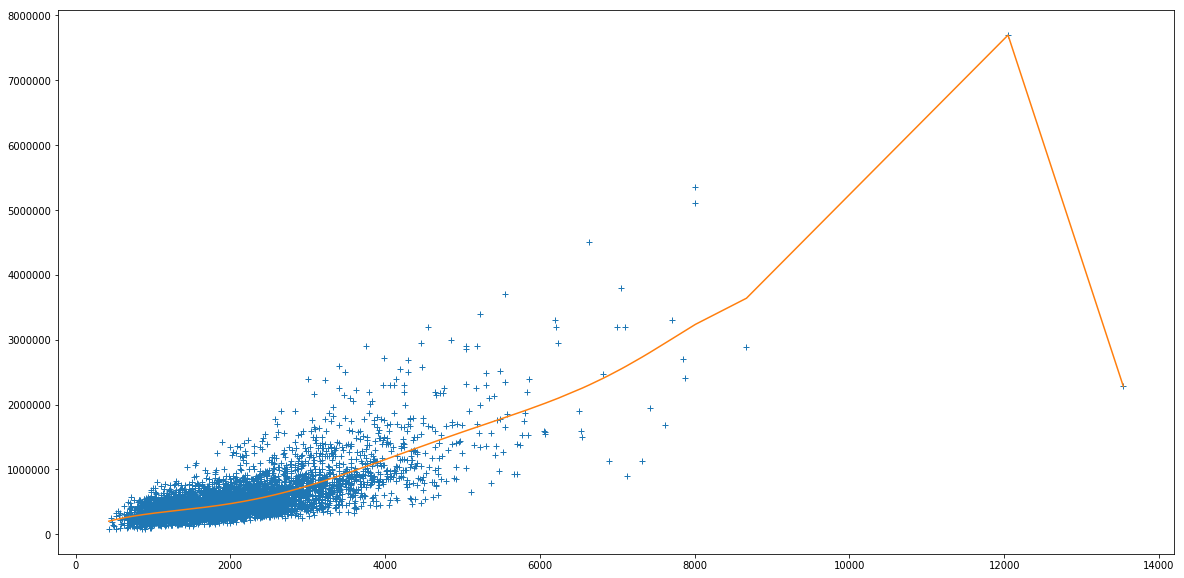

In [11]:
plot_and_weights(dfA, 15,l2_small_penalty)

(array([ 8.59362651e+02, -8.18118278e-01,  4.28879983e-04, -9.12770660e-08,
        -2.69604403e-12,  3.73980300e-15, -1.42711882e-19, -6.30794703e-23,
        -1.44559627e-27,  7.44321353e-31,  9.25865883e-35,  3.28010470e-41,
        -1.29543508e-42, -1.38781255e-46,  1.66546444e-50]),
 296862792348375.44)

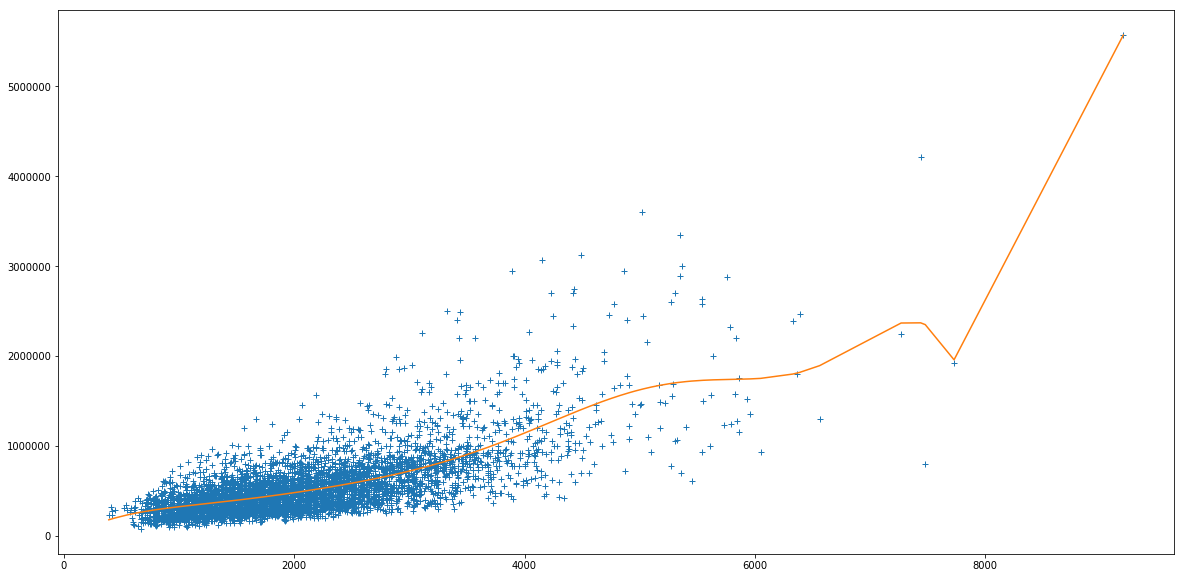

In [12]:
plot_and_weights(dfB, 15,l2_small_penalty)

(array([-7.55395933e+02,  9.75579500e-01, -4.58945978e-04,  7.77958008e-08,
         7.15013614e-12, -2.88602015e-15, -2.13677855e-20,  3.38085222e-23,
         2.19178203e-27, -1.97067781e-31, -4.15993180e-35, -1.80196157e-39,
         3.19071117e-43,  5.08456971e-47, -3.93304285e-51]), 340891019056957.3)

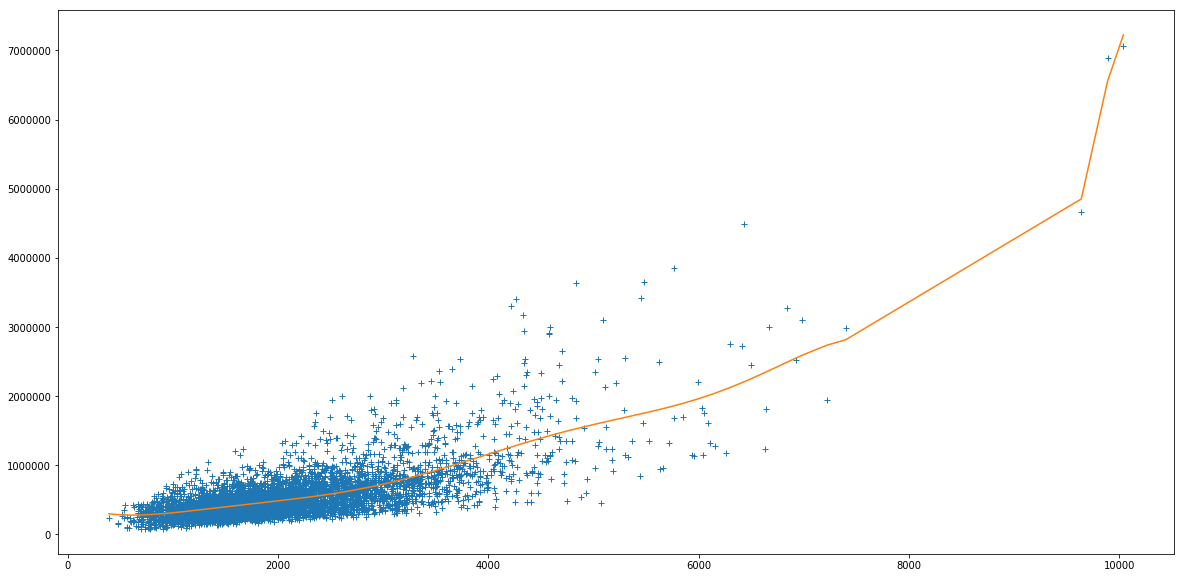

In [13]:
plot_and_weights(dfC, 15,l2_small_penalty)

(array([ 1.11944571e+03, -9.83760211e-01,  3.38770897e-04,  3.60377210e-08,
        -4.37814018e-11,  5.77191691e-15,  7.66795221e-19, -9.49297664e-23,
        -1.96030821e-26, -2.10880275e-32,  3.31005065e-34,  3.47733892e-38,
        -2.43039323e-42, -8.79553219e-46,  6.44569659e-50]), 322454841447508.1)

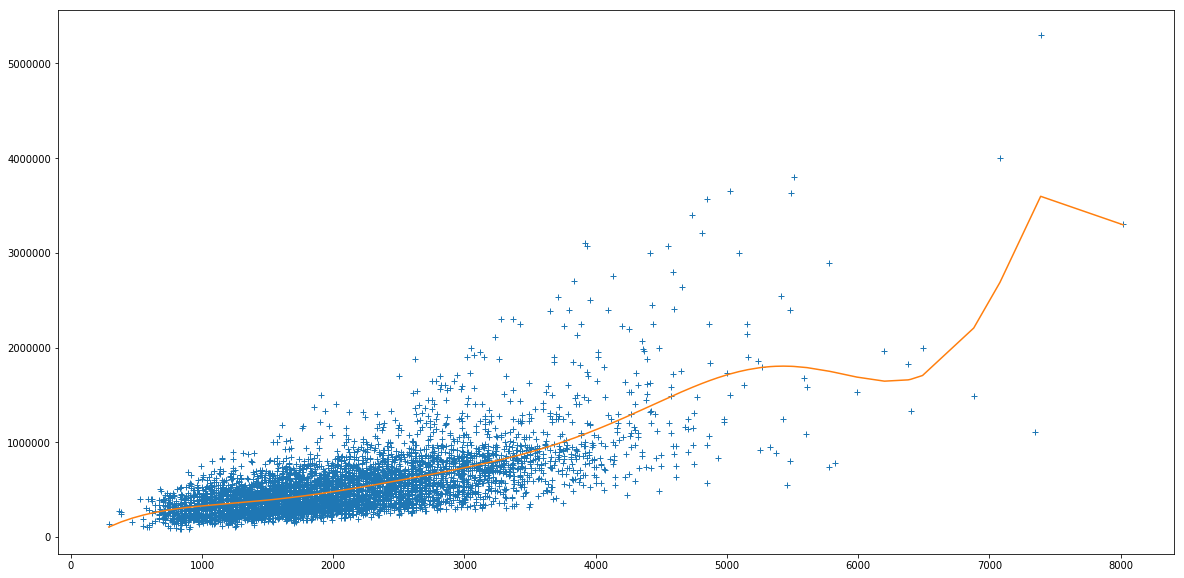

In [14]:
plot_and_weights(dfD, 15,l2_small_penalty)

My observations from these visualisations. I mean clearly already, even with a small alpha, there is less variance between the models than before, before the models were completely wild. The coefficients are also relatively small, some actually miniscule, but I guess it makes sense, since the features have been 'polynomialized'.

 8. Quiz Question: For the models learned in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1? (For the purpose of answering this question, negative numbers are considered "smaller" than positive numbers. So -5 is smaller than -3, and -3 is smaller than 5 and so forth.)
 
 Answer: 
  1.11944571e+03 Largest
  -7.55395933e+02 Smallest
  

### Ridge regression comes to rescue

In [15]:
l2_large_penalty=1.23e2

(array([2.32806803e+00, 3.53621608e-04, 3.31969692e-08, 2.00082477e-12,
        1.11492559e-16, 6.57786122e-21, 4.12939525e-25, 2.70393755e-29,
        1.81614763e-33, 1.23824277e-37, 8.51872481e-42, 5.89455598e-46,
        4.09542560e-50, 2.85464889e-54, 1.99547476e-58]), 804676339011764.5)

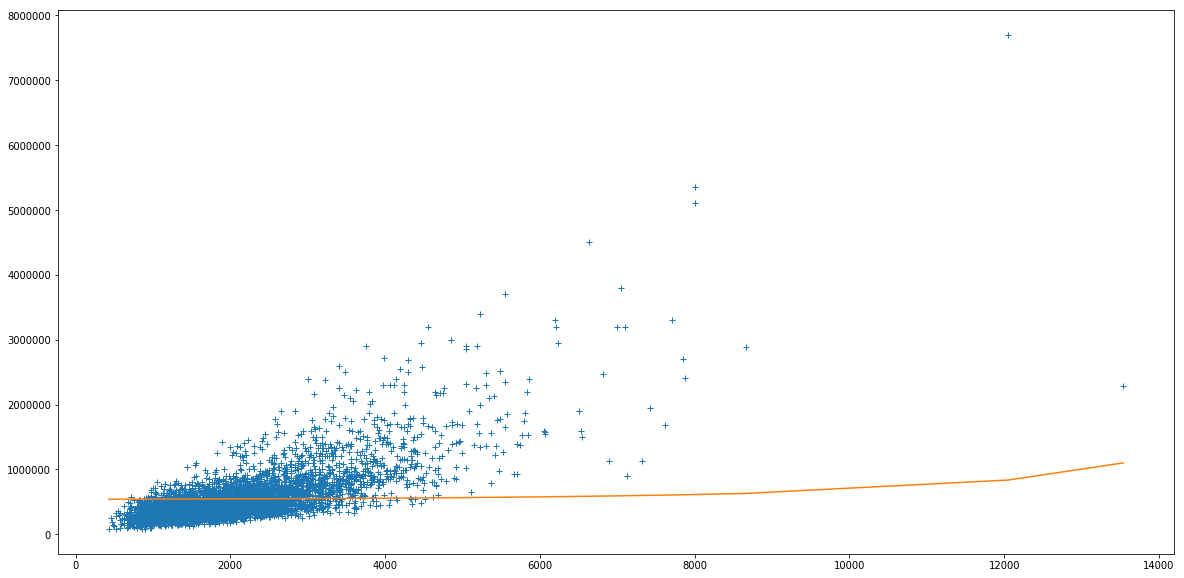

In [16]:
plot_and_weights(dfA, 15,l2_large_penalty)

(array([2.09756903e+00, 3.90817483e-04, 6.67189944e-08, 8.90002997e-12,
        9.72639877e-16, 9.69733682e-20, 9.50564475e-24, 9.44491031e-28,
        9.57191338e-32, 9.86945155e-36, 1.03101115e-39, 1.08729784e-43,
        1.15453748e-47, 1.23211305e-51, 1.31986696e-55]), 619988210070865.6)

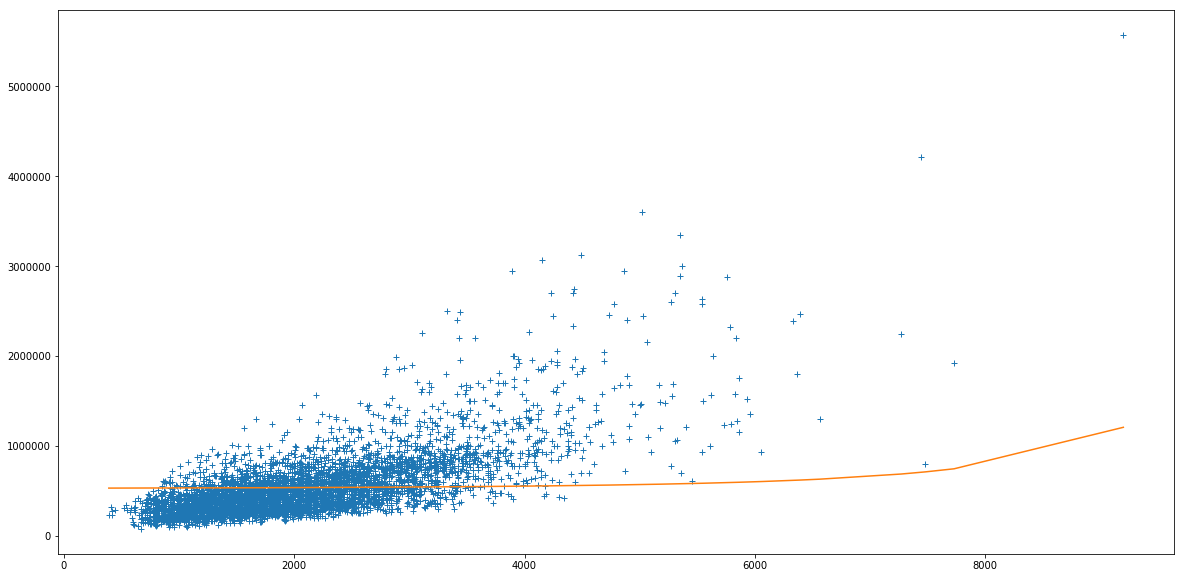

In [17]:
plot_and_weights(dfB, 15,l2_large_penalty)

(array([2.28906258e+00, 4.12472190e-04, 6.08835345e-08, 6.58572163e-12,
        6.15278155e-16, 5.64446634e-20, 5.28834396e-24, 5.07091402e-28,
        4.94657273e-32, 4.88043809e-36, 4.85009106e-40, 4.84161534e-44,
        4.84635021e-48, 4.85883628e-52, 4.87558469e-56]), 754160448991462.8)

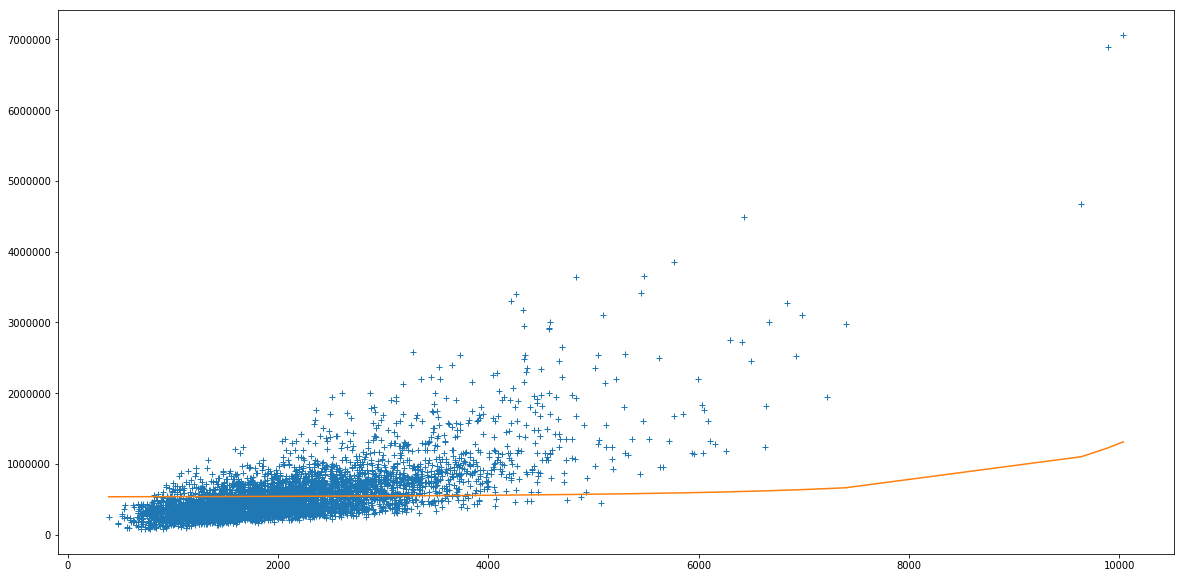

In [18]:
plot_and_weights(dfC, 15,l2_large_penalty)

(array([2.08596194e+00, 4.05035772e-04, 7.46864647e-08, 1.13096608e-11,
        1.45864442e-15, 1.73561251e-19, 2.01609632e-23, 2.34605255e-27,
        2.75636073e-31, 3.27043069e-35, 3.91046855e-39, 4.70118041e-43,
        5.67212304e-47, 6.85958087e-51, 8.30843630e-55]), 617316625701525.5)

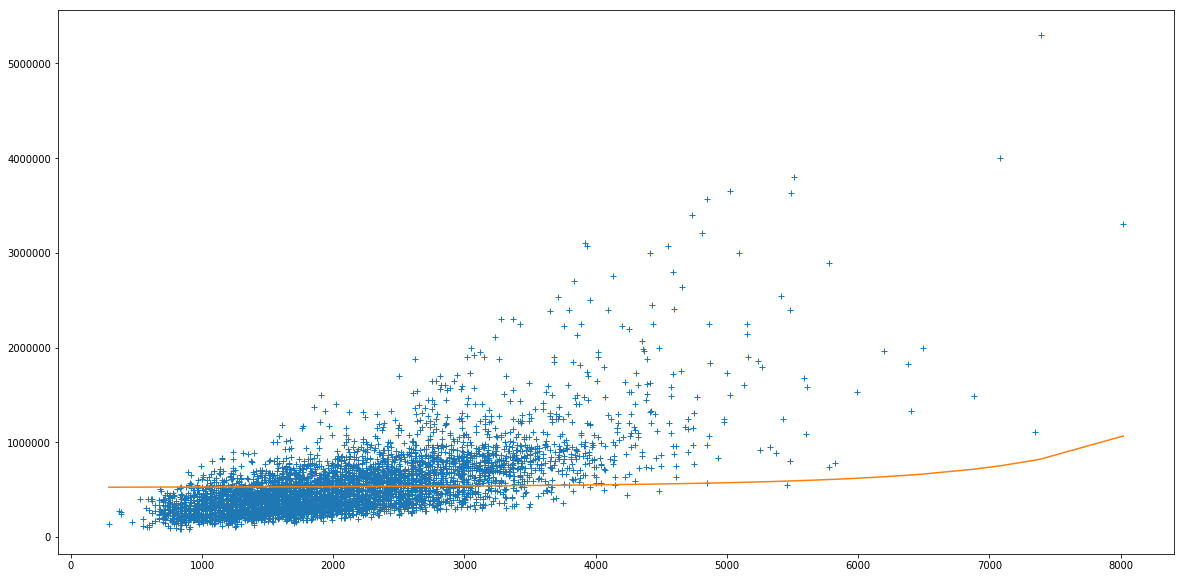

In [19]:
plot_and_weights(dfD, 15,l2_large_penalty)

I mean clearly we have acheived the objective of lowering model variance, however it is also clear that we have now underfit our models.

11. QUIZ QUESTION: For the models learned with regularization in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1?

Largest : 2.32806803e+00
Smallest : 2.08596194e+00

### Selecting an L2 penalty via cross-validation

In [20]:
dfShuffled = pd.read_csv('/home/antoni/PycharmProjects/JupyterProjects/Coursera: ML : Regression/Week 4 - Ridge Regression/wk3_kc_house_train_valid_shuffled.csv')

 15. Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) k, (ii) l2_penalty, (iii) dataframe containing input features (e.g. poly15_data) and (iv) column of output values (e.g. price). The function returns the average validation error using k segments as validation sets. We shall assume that the input dataframe does not contain the output column.

In [21]:
k = 10
l = []
for i in range(k):
    l.append('df' + str(i))
    n = dfShuffled.shape[0]
    l[i] = dfShuffled.copy()
    a = int(((n*i)/k))
    b = int(((n*(i+1))/k)+1)
    l[i] = l[i].loc[a:b]

In [22]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    z = []
    n = data.shape[0]
    for i in range(k-1):
        df_t = data.copy()
        a = int(((n*i)/k))
        b = int(((n*(i+1))/k)+1)
        df_t = df_t.loc[a:b]
        
        X_t = df_t
        y_t = output[a:b+1]
        lr = Ridge(alpha = l2_penalty, normalize = True)
        lr.fit(X_t,y_t)
        
        df_val = data.copy()
        df_val = df_val.loc[b:n]
        
        X_val = df_val
        y_val = output[b:n+1]
        
        predict = lr.predict(X_val)
        
        mse = mean_squared_error(y_val, predict)
        rss = mse * X_val.shape[0]
        
        z.append(rss)    
    average_validation_error = sum(z)/k
    return average_validation_error

#16. Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:

We will again be aiming to fit a 15th-order polynomial model using the sqft_living input
For each l2_penalty in [10^3, 10^3.5, 10^4, 10^4.5, ..., 10^9] (to get this in Python, you can use this Numpy function: np.logspace(3, 9, num=13).): Run 10-fold cross-validation with l2_penalty.
Report which L2 penalty produced the lowest average validation error.
Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop. Make sure to use train_valid_shuffled when generating polynomial features!



In [23]:
g = []
data = poly_df(dfShuffled.sqft_living, 15)
output = dfShuffled.price
for l2_penalty in np.logspace(3, 9, num=13):
    h = k_fold_cross_validation(10, l2_penalty, data, output)
    g.append((float(h), l2_penalty))

In [24]:
min(g)


(1242475604989814.5, 10000.0)

Quiz Question: What is the best value for the L2 penalty according to 10-fold validation?
10000


Quiz Question: Using the best L2 penalty found above, train a model using all training data. What is the RSS on the TEST data of the model you learn with this L2 penalty?

(array([2.81293287e-01, 5.19041694e-05, 9.11202746e-09, 1.34376237e-12,
        1.70606729e-16, 1.98217383e-20, 2.22310730e-24, 2.48832160e-28,
        2.82522386e-32, 3.27215108e-36, 3.86569156e-40, 4.64666423e-44,
        5.66466068e-48, 6.98203193e-52, 8.67805932e-56]), 283265705430072.56)

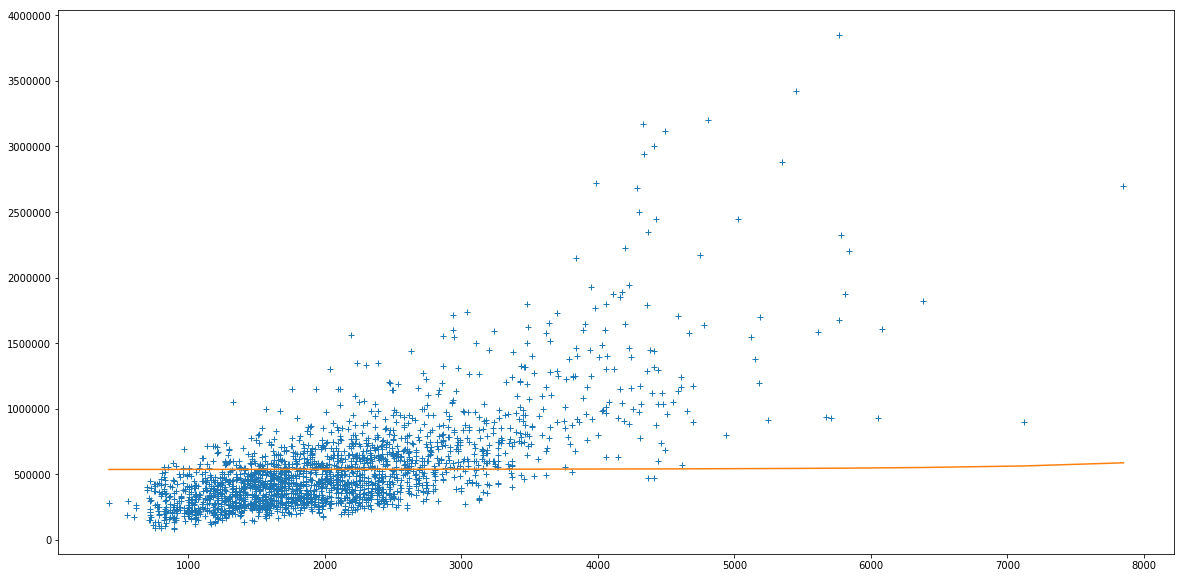

In [27]:
plot_and_weights(dfTest, 15, 10000.0)